In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
from ultralytics import YOLO

model = YOLO("../models/yolov8m-pose.pt")
# -seg, -cls, -pose 등의 접미사로 모델 불러오기 가능

100%|██████████| 50.8M/50.8M [00:00<00:00, 106MB/s]


# 영상 프레임 출력

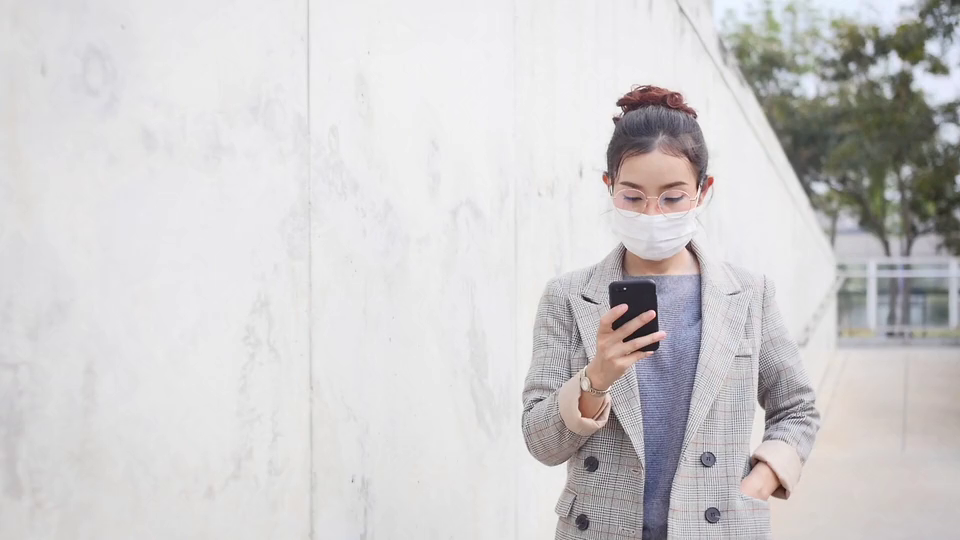

In [4]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("/content/drive/MyDrive/datasets/woman.mp4")
#구글 드라이브에 있는 영상 파일 불러오기
while cv2.waitKey(10) < 0: #키 입력이 없다면 10ms 대기하고 반복 실행
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
      #왼쪽은 현재 프레임, 오른쪽은 총 프레임 수, 영상이 끝나면 현재 프레임을 0으로 바꾸기
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read() #프레임을 읽은 경우 ret에는 True 값
    cv2_imshow(frame)
    break

capture.release()
cv2.destroyAllWindows()

In [5]:
import torch


def predict(frame, iou=0.7, conf=0.25):
    results = model(
        source=frame,
        device="0" if torch.cuda.is_available() else "cpu",
        iou=0.7, #중복된 경계 상자를 제거하는 기준
        conf=0.25, #클래스 점수 임계값
        verbose=False,
    )
    result = results[0] #이번 실습에서는 1개의 프레임만 입력
    #결과도 첫번째 결과만 출력
    return result

In [6]:
def draw_boxes(result, frame):
    for boxes in result.boxes:
    #YOLO의 출력 중 boxes에는 (1,6)의 형태의 결과가 들어있다, 객체가 여러개라면, (N, 6)
        x1, y1, x2, y2, score, classes = boxes.data.squeeze().cpu().numpy() #boxes의 형태
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 1)
    return frame

In [8]:
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 56,  59,  57],
        [ 57,  60,  58],
        [ 56,  59,  57]],

       [[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 57,  60,  58],
        [ 57,  60,  58],
        [ 55,  58,  56]],

       [[215, 214, 216],
        [215, 214, 216],
        [215, 214, 216],
        ...,
        [ 62,  65,  63],
        [ 61,  64,  62],
        [ 59,  62,  60]],

       ...,

       [[204, 206, 208],
        [204, 206, 208],
        [204, 206, 208],
        ...,
        [195, 190, 196],
        [195, 190, 196],
        [195, 190, 196]],

       [[204, 206, 208],
        [204, 206, 208],
        [204, 206, 208],
        ...,
        [195, 190, 196],

In [9]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9539])
data: tensor([[520.0000,  85.0000, 822.0000, 533.0000,   0.9539,   0.0000]])
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([1, 6])
xywh: tensor([[671., 309., 302., 448.]])
xywhn: tensor([[0.6990, 0.5722, 0.3146, 0.8296]])
xyxy: tensor([[520.,  85., 822., 533.]])
xyxyn: tensor([[0.5417, 0.1574, 0.8562, 0.9870]])

# BBOX 그리기

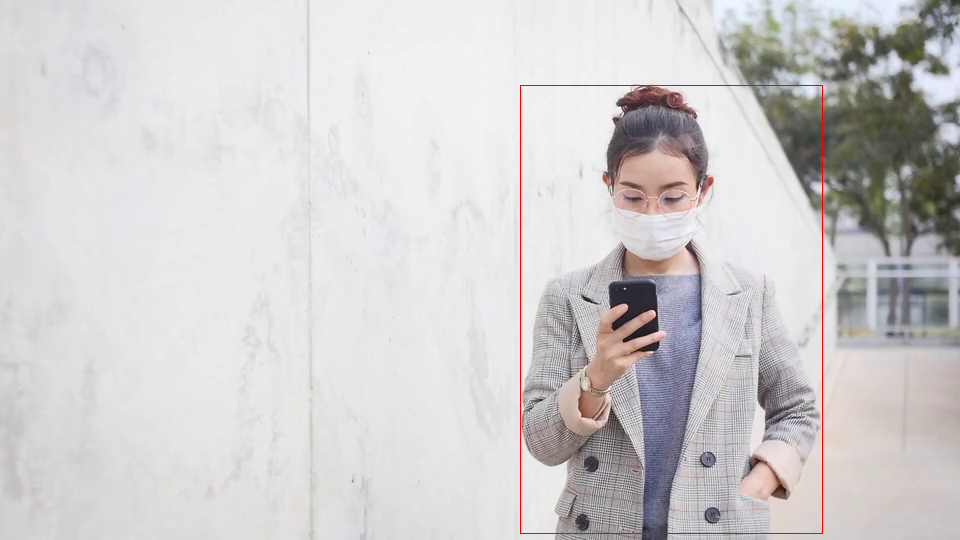

In [7]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("/content/drive/MyDrive/datasets/woman.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    cv2_imshow(frame)
    break

capture.release()
cv2.destroyAllWindows()

In [ ]:
from ultralytics.utils.plotting import Annotator

def draw_keypoints(result, frame):
    annotator = Annotator(frame, line_width=1)
    for kps in result.keypoints:
    #키포인트는 사람 수만큼 존재, 형태는 (17,3) 17개의 신체부위 예측 가능
    #3은 x,y,score
        kps = kps.data.squeeze()
        annotator.kpts(kps)

        nkps = kps.cpu().numpy()
        # nkps[:,2] = 1 #conf_score를 1로 바꾸어 모든 키포인트를 시각화할 수도 있다.
        # annotator.kpts(nkps)
        for idx, (x, y, score) in enumerate(nkps): #17번 반복
            if score > 0.5:
                cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), cv2.FILLED)
                cv2.putText(frame, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)

    return frame

# 포즈 추정

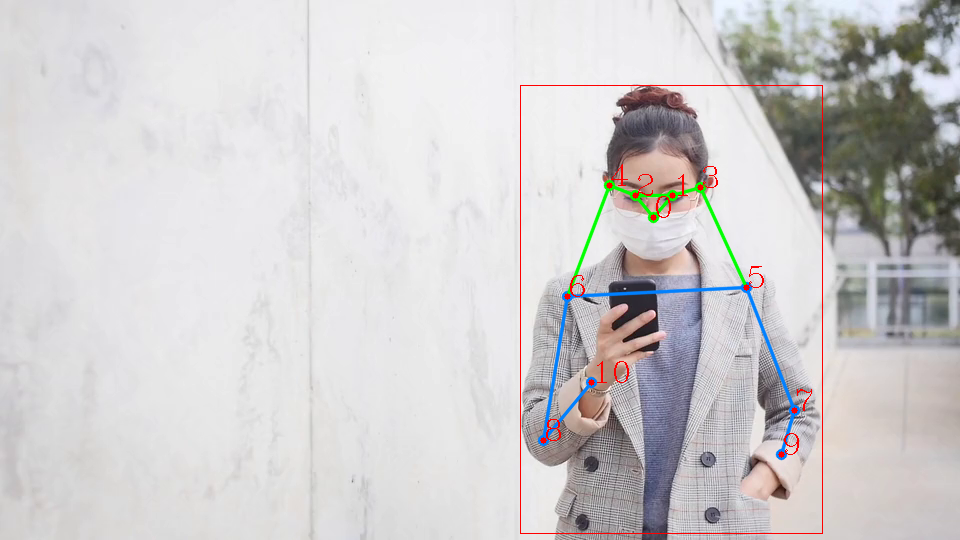

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("/content/drive/MyDrive/datasets/woman.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    frame = draw_keypoints(result, frame)
    cv2_imshow(frame)
    break #업로드 문제로 첫 프레임만 출력

capture.release()
cv2.destroyAllWindows()

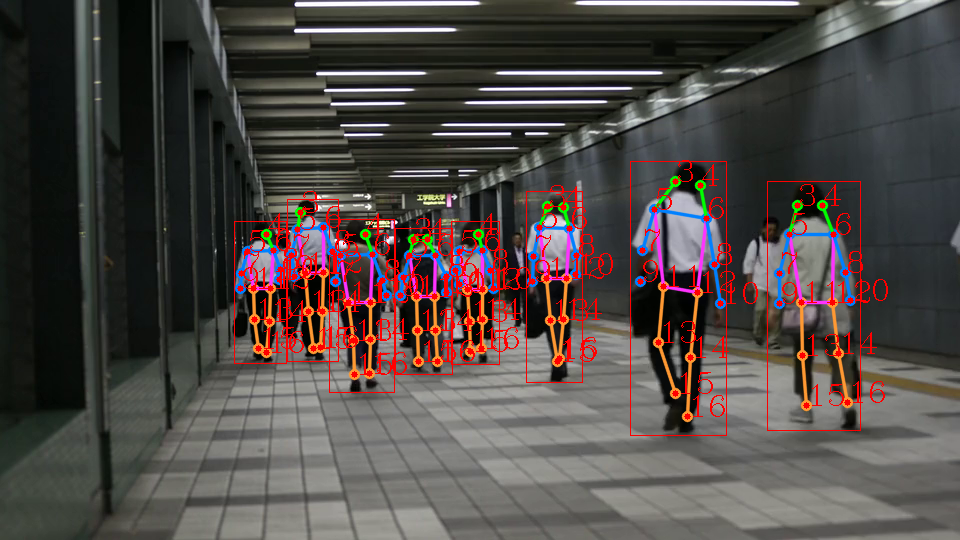

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("/content/drive/MyDrive/datasets/airport.mp4")
while cv2.waitKey(10) < 0:
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = capture.read()
    result = predict(frame)
    frame = draw_boxes(result, frame)
    frame = draw_keypoints(result, frame)
    cv2_imshow(frame)
    break #업로드 문제로 첫 프레임만 출력

capture.release()
cv2.destroyAllWindows()